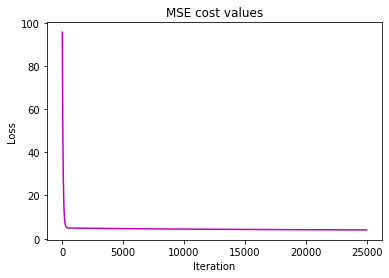

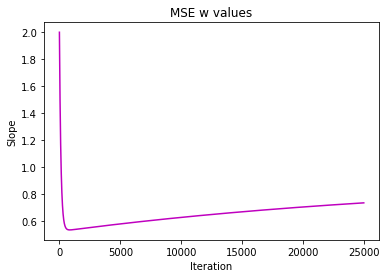

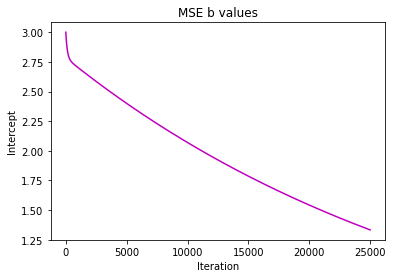

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x,y,w,b,w_values,b_values,cost_values,l,m,f):
  n = len(x)
  cost = 0 
  # If flage is 1 we would like to clean previous information
  if(f == 1):
    w_values = []
    b_values = []
    cost_values = []
  for i in range(25000): # We chose to do 25000 iterations
    y_pred = w*x + b  # The current predicted value of Y
    w_values.append(w)
    b_values.append(b)
    cost = np.abs(sum(y - y_pred)) / n # Cost function for MAE
    if(f == 1 and sum(y- y_pred) > 0):
      D_w = (-1/n) * sum(-x * (y - y_pred)) # Derivative of w(MAE when y is bigger than y pred)
      D_b = (-1/n) * sum((y - y_pred)*(-1)) # Derivative of b(MAE when y is bigger than y pred)
    elif(f == 1 and sum(y - y_pred) < 0):
      D_w = (-1/n) * sum(x * (y - y_pred)) # Derivative of w(MAE when y is smaller than y pred)
      D_b = (-1/n) * sum(y - y_pred) # Derivative of b(MAE when y smaller than y pred)
    elif(f == 1 and y - y_pred == 0): # If the sum is 0 there is no derivative for the function
      D_w = 0 # Set values to 0
      D_b = 0 # Set values to 0 
    else:
      D_w = (-2/n) * sum(x * (y - y_pred))  # Derivative of w(MSE)
      D_b = (-2/n) * sum(y - y_pred)  # Derivative of b(MSE)
      cost = sum((y-y_pred)**2) /n # If flag is 0 change to MSE cost function
    w = w - (l * D_w)  # Update m
    b = b - (l * D_b)  # Update c
    cost_values.append(cost)
    if(cost < 0.00001):
      break
  ploting(cost_values,w_values,b_values,f)
  return w * x + b

# ---- This function plots the graphs that were asked ---- #
# --- The function recives the history of the variables and a flag that indictes wether we used MAE or MSE function ---- #

def ploting(cost_values,w_values,b_values,f):
  func_name = "MSE" # Set the func name to MSE intialy
  if(f == 1):
    func_name = "MAE" # If the flag is 1 change it to MAE
  iteration = [i for i in range(0,len(w_values))] # Get how many iterations were done in the process
  # ---- Loss function values graph ---- #
  plt.plot(iteration, cost_values, color = "m") 
  plt.title(func_name + " cost values")
  plt.xlabel("Iteration")
  plt.ylabel("Loss")
  plt.show()
  # ---- Slope values graph ---- #
  plt.plot(iteration, w_values, color = "m") 
  plt.title(func_name + " w values")
  plt.xlabel("Iteration")
  plt.ylabel("Slope")
  plt.show()
  # ---- Interceptor values graph ---- #
  plt.plot(iteration, b_values, color = "m") 
  plt.title(func_name + " b values")
  plt.xlabel("Iteration")
  plt.ylabel("Intercept")
  plt.show()

# ---- End of functions ---- #
x= np.array(np.random.randint(10, size=(5)),dtype = np.float64)
y = np.array(np.random.randint(10, size=(5)),dtype = np.float64)
w = 2
b = 3
w_values = []
b_values = []
cost_values = []
l = 0.0001
# ---- Setting first w and b values and setting learning rate value ---- #
# ---- Performing Gradient Descent with MSE function ---- #
line_mse = gradient_descent(x,y,w,b,w_values,b_values,cost_values,l,2,0)

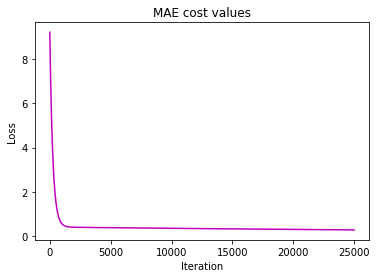

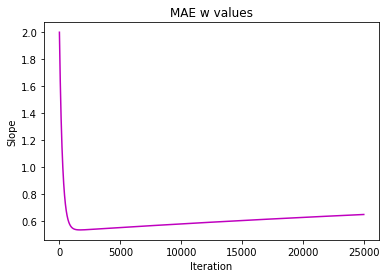

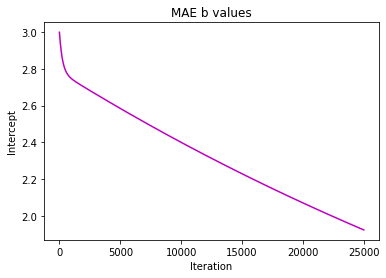

In [16]:
line_mae = gradient_descent(x,y,w,b,w_values,b_values,cost_values,l,1,1)

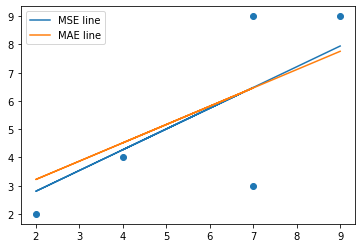

In [17]:
plt.scatter(x,y) 
plt.plot(x, line_mse,label = "MSE line")
plt.plot(x, line_mae, label = "MAE line")
plt.legend()
plt.show()